2(b) i
---

In [261]:
import pandas as pd
Location = '../Data/network_backup_dataset.csv'
df = pd.read_csv(Location)
lables = df.columns

import re
def scalar_encoding(df_):    
    df_['Day of Week'][:] = df_['Day of Week'][:].map({'Monday': int(1), 'Tuesday': int(2), 'Wednesday':int(3), 'Thursday':int(4), 'Friday':int(5), 'Saturday':int(6), 'Sunday':int(7)})
    df_['Work-Flow-ID'][:] = df_['Work-Flow-ID'][:].map({'work_flow_0': int(0), 'work_flow_1': int(1), 'work_flow_2': int(2), 'work_flow_3': int(3), 'work_flow_4': int(4)})
    df_['File Name'][:] = list(map(lambda x:int(re.search(r'\d+', x).group()), df_['File Name'][:]))
    return df_

df_scalar = scalar_encoding(df)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import scipy as sp
import matplotlib

Training = df_scalar.copy()
Training.drop(lables[6], axis=1, inplace=True)


rdf = RandomForestRegressor(n_estimators=20, max_features=5, max_depth=4, oob_score=True, random_state=0)
kf = KFold(n_splits=10)
kf.get_n_splits(Training)


def performance(trainset, testset, classifier):
    target_train = trainset.pop(lables[5])
    target_test = testset.pop(lables[5])
    classifier.fit(trainset, target_train)
    Predict_train = classifier.predict(trainset)
    Predict_test = classifier.predict(testset)
    RMSE_train = Predict_train - target_train
    RMSE_test = Predict_test - target_test
    return RMSE_train, RMSE_test

def square(list):
    return [i ** 2 for i in list]

def output_ave_RMSE(list_rmse, data_points):
    list_rmse = list(matplotlib.cbook.flatten(list_rmse))
    ave_rmse = sp.sqrt(sp.sum(square(list_rmse))/float(data_points))
    return ave_rmse

RMSE_train_set = []
RMSE_test_set = []
for train_index, test_index in kf.split(Training):
    trainset = Training.iloc[train_index, :]
    testset = Training.iloc[test_index, :]
    data_points_train = len(train_index)
    data_points_test = len(test_index)
    RMSE_train, RMSE_test = performance(trainset, testset, rdf)
    RMSE_train_set.append(RMSE_train)
    RMSE_test_set.append(RMSE_test)
    #print(RMSE_train, RMSE_test)
ave_rmse_train = output_ave_RMSE(RMSE_train_set, 10*data_points_train)
ave_rmse_test = output_ave_RMSE(RMSE_test_set, 10*data_points_test)
print('Average Train RMSE is: %s'%ave_rmse_train)
print('Average Test RMSE is: %s'%ave_rmse_test)

def out_of_bag_error(trainset, classifier):
    trainset_ = trainset.copy()
    target_train = trainset_.pop(lables[5]) 
    classifier.fit(trainset_, target_train)
    return (1- classifier.oob_score_)

OOBE = out_of_bag_error(Training, rdf)
print('out of bag error is: %s'%OOBE)

C:\Users\Jinxi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jinxi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Jinxi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Average Train RMSE is: 0.0603416698099
Average Test RMSE is: 0.0605420221758
out of bag error is: 0.343369776393


2(b) ii
---

In [262]:
import pandas as pd
Location = '../Data/network_backup_dataset.csv'
df = pd.read_csv(Location)
lables = df.columns

import re
def scalar_encoding(df_):    
    df_['Day of Week'][:] = df_['Day of Week'][:].map({'Monday': int(1), 'Tuesday': int(2), 'Wednesday':int(3), 'Thursday':int(4), 'Friday':int(5), 'Saturday':int(6), 'Sunday':int(7)})
    df_['Work-Flow-ID'][:] = df_['Work-Flow-ID'][:].map({'work_flow_0': int(0), 'work_flow_1': int(1), 'work_flow_2': int(2), 'work_flow_3': int(3), 'work_flow_4': int(4)})
    df_['File Name'][:] = list(map(lambda x:int(re.search(r'\d+', x).group()), df_['File Name'][:]))
    return df_

df_scalar = scalar_encoding(df)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import scipy as sp
import matplotlib
import numpy as np

Training = df_scalar.copy()
Training.drop(lables[6], axis=1, inplace=True)


rdf = RandomForestRegressor(n_estimators=20, max_features=5, max_depth=4, oob_score=True, random_state=0)
kf = KFold(n_splits=10)
kf.get_n_splits(Training)

def performance(trainset, testset, classifier):
    trainset_ = trainset.copy()
    testset_ = testset.copy()
    target_train = trainset_.pop(lables[5])
    target_test = testset_.pop(lables[5])
    classifier.fit(trainset_, target_train)
    Predict_train = classifier.predict(trainset_)
    Predict_test = classifier.predict(testset_)
    RMSE_train = Predict_train - target_train
    RMSE_test = Predict_test - target_test
    return RMSE_train, RMSE_test

def square(list):
    return [i ** 2 for i in list]

def output_ave_RMSE(list_rmse, data_points):
    list_rmse = list(matplotlib.cbook.flatten(list_rmse))
    ave_rmse = sp.sqrt(sp.sum(square(list_rmse))/float(data_points))
    return ave_rmse



def out_of_bag_error(trainset, classifier):
    trainset_ = trainset.copy()
    target_train = trainset_.pop(lables[5]) 
    classifier.fit(trainset_, target_train)
    return (1- classifier.oob_score_)


def sweep_performance(trainset,testset,k):
    for i in range(1,201):
        for j in range(1,6):
            rdf_ = RandomForestRegressor(n_estimators=i, max_features=j, max_depth=4, oob_score=True, random_state=0)
            _, RMSE_test = performance(trainset, testset, rdf_)
            if k == 0:
                RMSE_test_set[i][j]=list(RMSE_test)
            else:
                RMSE_test_set[i][j].append(RMSE_test)
    #print(RMSE_train, RMSE_test)
    

RMSE_test_set = [[[] for i in range(6)] for i in range(201)]
k = 0
for train_index, test_index in kf.split(Training):
    trainset = Training.iloc[train_index, :]
    testset = Training.iloc[test_index, :]
    data_points_train = len(train_index)
    data_points_test = len(test_index)
    #print(k)
    sweep_performance(trainset,testset,k)
    #print('len=%s'%[RMSE_test_set[i][j]])
    k+=1
    #print(RMSE_train, RMSE_test)
    


 #OOBE[i,j] = out_of_bag_error(training, rdf_)

C:\Users\Jinxi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jinxi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Jinxi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

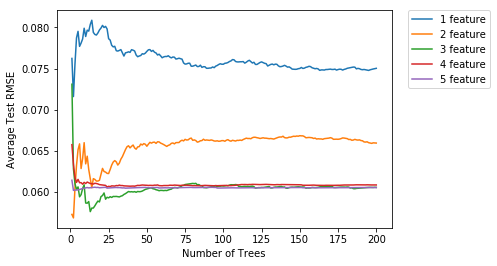

In [263]:
import matplotlib.pyplot as plt

ave_rmse_test =  np.zeros((201,6))
for i in range(1, 201):
    for j in range(1,6):
        #print([i,j])
        list_rmse = list(matplotlib.cbook.flatten(RMSE_test_set[i][j]))
        ave_rmse_test[i,j] = sp.sqrt(sp.sum(square(list_rmse))/float(data_points_test*10))
        #print('Average Test RMSE is: %s'%ave_rmse_test[i,j])

x_list = range(1,201)

plt.plot(x_list, ave_rmse_test[1:,1], label= '1 feature')
plt.plot(x_list, ave_rmse_test[1:,2], label = '2 feature')
plt.plot(x_list, ave_rmse_test[1:,3], label = '3 feature')
plt.plot(x_list, ave_rmse_test[1:,4], label = '4 feature')
plt.plot(x_list, ave_rmse_test[1:,5], label = '5 feature')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Average Test RMSE')
plt.xlabel('Number of Trees')
plt.show()

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jinxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

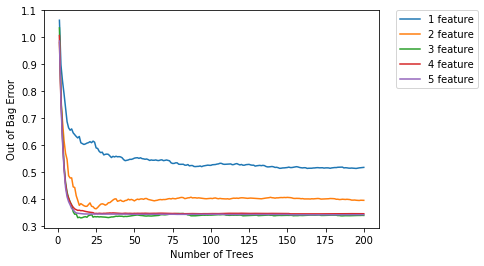

In [264]:
from sklearn.ensemble import RandomForestRegressor

OOBE = np.zeros((201,6))
for i in range(1,201):
        for j in range(1,6):
            rdf__ = RandomForestRegressor(n_estimators=i, max_features=j, max_depth=4, oob_score=True, random_state=0)
            OOBE[i,j] = out_of_bag_error(Training, rdf__)
            

x_list = range(1,201)

plt.plot(x_list, OOBE[1:,1], label= '1 feature')
plt.plot(x_list, OOBE[1:,2], label = '2 feature')
plt.plot(x_list, OOBE[1:,3], label = '3 feature')
plt.plot(x_list, OOBE[1:,4], label = '4 feature')
plt.plot(x_list, OOBE[1:,5], label = '5 feature')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Out of Bag Error')
plt.xlabel('Number of Trees')
plt.show()

2(b) iii
---

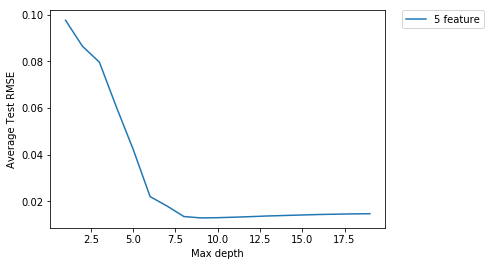

In [265]:
from sklearn.ensemble import RandomForestRegressor

RMSE_d = [[] for i in range(20)]
def sweep_max_depth(trainset, testset, k):
    for i in range(1,20):
        rdf_d = RandomForestRegressor(n_estimators=20, max_features=5, max_depth=i, oob_score=True, random_state=0)
        _, RMSE_test = performance(trainset, testset, rdf_d)
        if k == 0:
            RMSE_d[i] = list(RMSE_test)
        else:
            RMSE_d[i].append([RMSE_test])
            
            
k = 0
for train_index, test_index in kf.split(Training):
    trainset = Training.iloc[train_index, :]
    testset = Training.iloc[test_index, :]
    data_points_train = len(train_index)
    data_points_test = len(test_index)
    sweep_max_depth(trainset, testset, k)
    k += 1

ave_rmse_d = [[] for i in range(20)]
for i in range(1,20):
    list_rmse = list(matplotlib.cbook.flatten(RMSE_d[i]))
    ave_rmse_d[i] = sp.sqrt(sp.sum(square(list_rmse))/float(data_points_test*10))

x_list = range(1,20)

plt.plot(x_list, ave_rmse_d[1:], label= '5 feature')   
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Average Test RMSE')
plt.xlabel('Max depth')
plt.show()

[[], 0.87543008248908671, 0.68865208172553338, 0.58918398896990487, 0.34336977639251742, 0.16795184527835971, 0.046302386556930641, 0.030224895328095691, 0.016608978010756337, 0.015149501644034835, 0.015566493081975774, 0.01621093505184612, 0.016897184225393436, 0.017404006331963817, 0.018083112308729055, 0.018483592520637027, 0.019012902587604907, 0.019324053950754205, 0.019669298992381234, 0.019805068360958966]


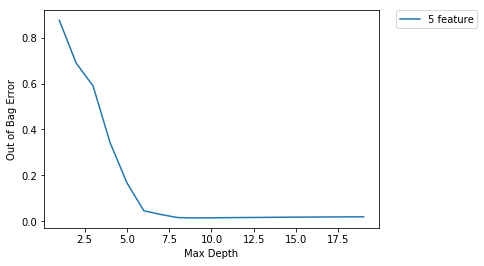

In [242]:
from sklearn.ensemble import RandomForestRegressor

OOBE_d = [[]for i in range(20)]
for i in range(1,20):
    rdf_d= RandomForestRegressor(n_estimators=20, max_features=5, max_depth=i, oob_score=True, random_state=0)
    OOBE_d[i] = out_of_bag_error(Training, rdf_d)
            
print(OOBE_d)
x_list = range(1,20)

plt.plot(x_list, OOBE_d[1:], label= '5 feature')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Out of Bag Error')
plt.xlabel('Max Depth')
plt.show()

2(b) iv
---

In [246]:
#Best parameter: max_depth = 9, number_of_trees = 25, features = 5
from sklearn.ensemble import RandomForestRegressor

rdf_best= RandomForestRegressor(n_estimators=25, max_features=5, max_depth=9, oob_score=True, random_state=0)
Feature_im_l = []
for train_index, test_index in kf.split(Training):
    trainset = Training.iloc[train_index, :]
    testset = Training.iloc[test_index, :]
    data_points_train = len(train_index)
    data_points_test = len(test_index)
    trainset_ = trainset.copy()
    target_train = trainset_.pop(lables[5]) 
    rdf_best.fit(trainset_, target_train)
    Feature_im_l.append(rdf_best.feature_importances_) 
ave_feature_importance = np.mean(np.array(Feature_im_l), axis=0)
print(ave_feature_importance)

[ 0.00170334  0.20005286  0.39539005  0.16209039  0.24076336]


2(b) v
---

In [256]:
from sklearn import tree

rdf_best= RandomForestRegressor(n_estimators=25, max_features=5, max_depth=9, oob_score=True, random_state=0)
trainset_ = Training.copy()
target_train = trainset_.pop(lables[5]) 
rdf_best.fit(trainset_, target_train)
trees = rdf_best.estimators_
clf = trees[0]
fobj = open("C:/Users/Jinxi/Desktop/EE219/Project_4/Result/tree.dot", 'w')
tree.export_graphviz(clf, out_file=fobj, feature_names = ['Week #','Day of Week','Hour of Day','Work-Flow-ID','File Name'])
fobj.close()


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names = ['Week #','Day of Week','Hour of Day','Work-Flow-ID','File Name'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


InvocationException: GraphViz's executables not found

Scatter Plot
---

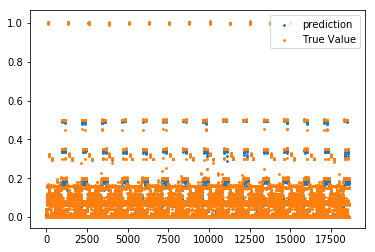

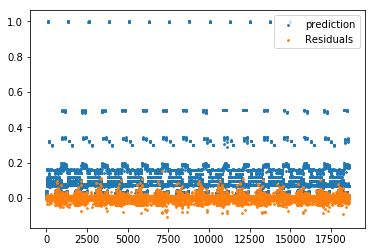

In [260]:
#Best parameter: max_depth = 9, number_of_trees = 25, features = 5
from sklearn.ensemble import RandomForestRegressor
import pandas 
rdf_best= RandomForestRegressor(n_estimators=25, max_features=5, max_depth=9, oob_score=True, random_state=0)


trainset_ = Training.copy()
target_train = trainset_.pop(lables[5]) 
rdf_best.fit(trainset_, target_train)
prediction = rdf_best.predict(trainset_)


import matplotlib.pyplot as plt

area = np.pi * (1)**2  # 0 to 15 point radii
plt.scatter(range(18588), prediction, s=area, label='prediction')
plt.scatter(range(18588), target_train, s=area, label='True Value')
plt.legend()
plt.show()

area = np.pi * (1 )**2  # 0 to 15 point radii
plt.scatter(range(18588), prediction, s=area, label='prediction')
plt.scatter(range(18588), target_train-prediction, s=area, label='Residuals')
plt.legend()
plt.show()